In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/china-gdp-dataset/ml/ML0101EN-Clus-DBSCN-weather-py-v1.ipynb
/kaggle/input/china-gdp-dataset/ml/ML0101EN-Clus-Hierarchical-Cars-py-v1.ipynb
/kaggle/input/china-gdp-dataset/ml/Final Assignimet.ipynb
/kaggle/input/china-gdp-dataset/ml/ML0101EN-RecSys-Content-Based-movies-py-v1.ipynb
/kaggle/input/china-gdp-dataset/ml/drug200.csv
/kaggle/input/china-gdp-dataset/ml/ML0101EN-Clas-K-Nearest-neighbors-CustCat-py-v1.ipynb
/kaggle/input/china-gdp-dataset/ml/README.txt
/kaggle/input/china-gdp-dataset/ml/china_gdp.csv
/kaggle/input/china-gdp-dataset/ml/ML0101EN-Clus-K-Means-Customer-Seg-py-v1.ipynb
/kaggle/input/china-gdp-dataset/ml/ML0101EN-Clas-Logistic-Reg-churn-py-v1.ipynb
/kaggle/input/china-gdp-dataset/ml/teleCust1000t.csv
/kaggle/input/china-gdp-dataset/ml/ML0101EN-Proj-Loan-answer-py-v1.ipynb
/kaggle/input/china-gdp-dataset/ml/loan_test.csv
/kaggle/input/china-gdp-dataset/ml/Final Assignimet (1).ipynb
/kaggle/input/china-gdp-dataset/ml/cell_samples.csv
/kaggle/input/china-gd

In [12]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [14]:
df=pd.read_csv("/kaggle/input/china-gdp-dataset/ml/ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [15]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [16]:
df.drop(columns=['equip','callcard','wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon','wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager','internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll','lninc','churn'],inplace=True)
df.head()

,tenure,age,address,income,ed,employ,custcat
0,11.0,33.0,7.0,136.0,5.0,5.0,4.0
1,33.0,33.0,12.0,33.0,2.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,3.0
3,38.0,35.0,5.0,76.0,2.0,10.0,4.0
4,7.0,35.0,14.0,80.0,2.0,15.0,3.0


In [17]:
To use scikitlearn library, we have to convert the Pandas data frame to a Numpy array.
    

SyntaxError: invalid syntax (1361403620.py, line 1)

In [18]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'custcat'], dtype='object')

In [27]:
X= df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'custcat']].values
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   4.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   1.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   3.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   4.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   3.]])

In [20]:
y= df["custcat"].values
y[0:5]

array([4., 1., 3., 4., 3.])

In [28]:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841,  1.41630855],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -1.36987221],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635,  0.48758163],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.41630855],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472,  0.48758163]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [32]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.85 , 0.775, 0.8  , 0.825, 0.825, 0.8  , 0.775, 0.775, 0.75 ])

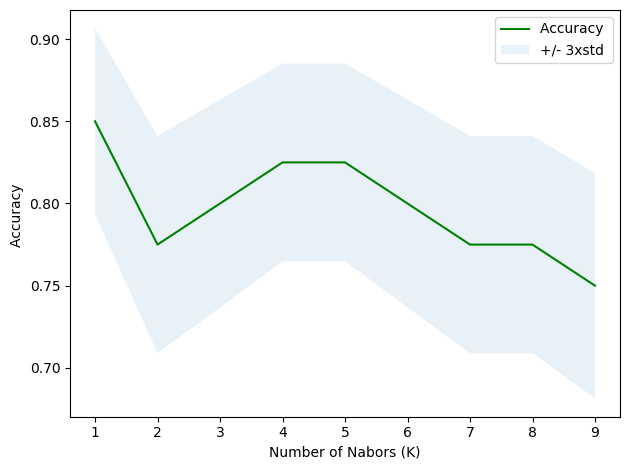

In [33]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [34]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.85 with k= 1
